# Get and look at GCAT files
### Get GCAT files from https://archive.stsci.edu/prepds/gcat/gcat_dataproducts.html

In [1]:
import urllib.request
import os
outdir = "/home/buehler/Downloads/msc/"
chunkdir = outdir + "manflag/"
nr_chunks = 192
chunks = ["075","076","077","079","080","081","082","083","084","085","087","088","089","091","092","093","094","095","096","097","098","099","100","103","104","107","108","109","110","111","112","113","114","116","119","120","121","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191"]

#"000","001","002","003","004","005","006","007","008","009","010","011","012","013","014","015","016","017","018","019","020","021","022","023","024","025","026","027","028","029","030","031","032","033","034","035","036","037","038","039","040","041","042","043","044","045","046","047","049","050","051","052","053","054","055","056","057","058","059","060","061","062","063","064","065","066","067","068","069","071",
if not os.path.exists(outdir):
    os.makedirs(outdir)
for chunkstr in chunks:
    print("Getting chunk:",chunkstr)
    url_base = f"https://archive.stsci.edu/pub/hlsp/gcat/msc/chunks/{chunkstr}/healpix/nside16384/fitstable/"
    fname = f"SP_{chunkstr}_14-msc-nd-manflag.fits.gz"
    urllib.request.urlretrieve(url_base+fname,chunkdir+fname)

Getting chunk: 075
Getting chunk: 076
Getting chunk: 077
Getting chunk: 079
Getting chunk: 080
Getting chunk: 081
Getting chunk: 082
Getting chunk: 083
Getting chunk: 084
Getting chunk: 085
Getting chunk: 087
Getting chunk: 088
Getting chunk: 089
Getting chunk: 091
Getting chunk: 092
Getting chunk: 093
Getting chunk: 094
Getting chunk: 095
Getting chunk: 096
Getting chunk: 097
Getting chunk: 098
Getting chunk: 099
Getting chunk: 100
Getting chunk: 103
Getting chunk: 104
Getting chunk: 107
Getting chunk: 108
Getting chunk: 109
Getting chunk: 110
Getting chunk: 111
Getting chunk: 112
Getting chunk: 113
Getting chunk: 114
Getting chunk: 116
Getting chunk: 119
Getting chunk: 120
Getting chunk: 121
Getting chunk: 123
Getting chunk: 124
Getting chunk: 125
Getting chunk: 126
Getting chunk: 127
Getting chunk: 128
Getting chunk: 129
Getting chunk: 130
Getting chunk: 131
Getting chunk: 132
Getting chunk: 133
Getting chunk: 134
Getting chunk: 135
Getting chunk: 136
Getting chunk: 137
Getting chun

### Reduce GCAT healpix maps
Note, that maps come in healpix pixel come in nside=16384 nested scheme in Galactic coordinates

In [5]:
from astropy.table import Table
#import time
import numpy as np

chunks = ["000","001","002","003","004","005","006","007","008","009","010","011","012","013","014","015","016","017","018","019","020","021","022","023","024","025","026","027","028","029","030","031","032","033","034","035","036","037","038","039","040","041","042","043","044","045","046","047","049","050","051","052","053","054","055","056","057","058","059","060","061","062","063","064","065","066","067","068","069","071","075","076","077","079","080","081","082","083","084","085","087","088","089","091","092","093","094","095","096","097","098","099","100","103","104","107","108","109","110","111","112","113","114","116","119","120","121","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191"]
outdir = "/home/buehler/Downloads/msc/"
chunkdir = outdir + "manflag/"
dd_data = {"pix_id":[],"manflag":[]}
for chunkstr in chunks:
    fname = f"SP_{chunkstr}_14-msc-nd-manflag.fits"
    print("Reading file",chunkdir+fname)
    tt = Table.read(chunkdir+fname)
    sel = tt["SIGNAL"]>0
    dd_data["pix_id"].extend(np.array(tt["PIXEL"][sel],dtype=np.int64))
    dd_data["manflag"].extend(np.array(tt["SIGNAL"][sel],dtype=np.int32))
    #time.sleep(2)
tt_stack = Table(dd_data)
display(tt_stack)
tt_stack.write(outdir+"gcat_msc_manflag.fits")
#hmap = hp.read_map(outdir+fname)
#print(hmap)

Reading file /home/buehler/Downloads/msc/manflag/SP_000_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_001_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_002_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_003_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_004_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_005_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_006_14-msc-nd-manflag.fits


Reading file /home/buehler/Downloads/msc/manflag/SP_007_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_008_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_009_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_010_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_011_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_012_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_013_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_014_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_015_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_016_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_017_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_018_14-msc-nd-manflag.fits
Reading file /home/buehler/Downloads/msc/manflag/SP_

pix_id,manflag
int64,int32
12298671,1
12298679,1
12298681,1
12298682,1
12298683,1
12298684,1
...,...
3206365539,1
3206365540,1


In [ ]:
### Plor GCAT maps

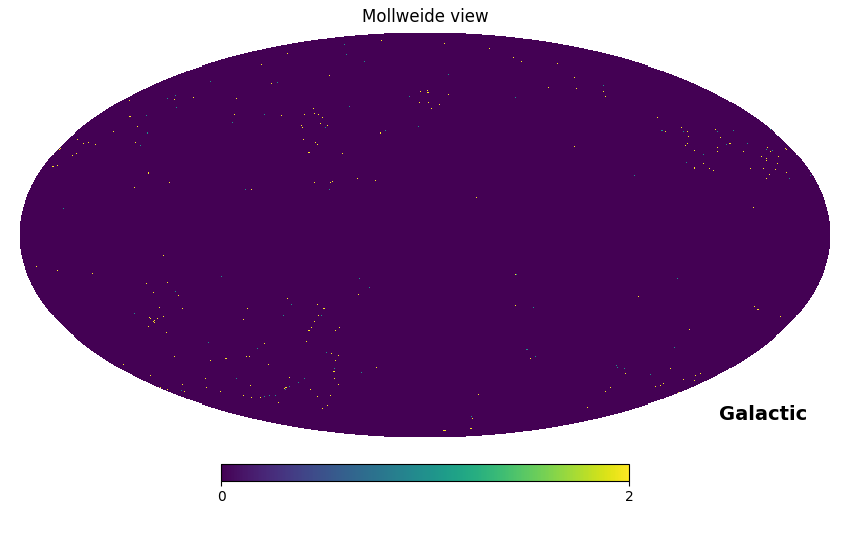

In [5]:
import healpy as hp
from astropy.table import Table
import numpy as np
%matplotlib widget
outdir = "/home/buehler/Downloads/msc/"
nside = 16384
npix = hp.nside2npix(nside)
hp_map = np.zeros(npix, dtype=np.int32)
tt_stack = Table.read(outdir+"gcat_msc_manflag.fits")
pix_ids = tt_stack["pix_id"].data.astype(np.int64)
hp_map[pix_ids] = tt_stack["manflag"]
hp.mollview(hp_map,coord="G",nest=True)

In [ ]:
import healpy as hp
%matplotlib widget
fname = "./resources/HP_12-msc-nd-flagmap.fits"
hmap = hp.read_map(fname)
print(hmap)
hp.orthview(hmap,coord="G",title="Artifacts galactic coordinates", rot = [180,-90])
hp.graticule()

In [3]:
diff_flux = 1e5  # in m-2 sr-1 LET flux >10 MeV cm-2 g-1
flux_cm2 = 1e5 * 2*3.1416/1e4
print(flux_cm2)
cross = 1e-7
rate = flux_cm2*cross/3.5
print("Latchups per year", rate)



62.832
Latchups per year 1.7951999999999998e-06
